## Importing the Data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('yellow_tripdata_2020-01.csv')

In [3]:
df. head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,1.0,2020-01-01 00:28:15,2020-01-01 00:33:03,1.0,1.2,1.0,N,238,239,1.0,6.0,3.0,0.5,1.47,0.0,0.3,11.27,2.5
1,1.0,2020-01-01 00:35:39,2020-01-01 00:43:04,1.0,1.2,1.0,N,239,238,1.0,7.0,3.0,0.5,1.50,0.0,0.3,12.30,2.5
2,1.0,2020-01-01 00:47:41,2020-01-01 00:53:52,1.0,0.6,1.0,N,238,238,1.0,6.0,3.0,0.5,1.00,0.0,0.3,10.80,2.5
3,1.0,2020-01-01 00:55:23,2020-01-01 01:00:14,1.0,0.8,1.0,N,238,151,1.0,5.5,0.5,0.5,1.36,0.0,0.3,8.16,0.0
4,2.0,2020-01-01 00:01:58,2020-01-01 00:04:16,1.0,0.0,1.0,N,193,193,2.0,3.5,0.5,0.5,0.00,0.0,0.3,4.80,0.0


## Exploratory Data Analysis

In [4]:
df.shape

(6405008, 18)

In [5]:
df.dtypes

VendorID                 float64
tpep_pickup_datetime      object
tpep_dropoff_datetime     object
passenger_count          float64
trip_distance            float64
RatecodeID               float64
store_and_fwd_flag        object
PULocationID               int64
DOLocationID               int64
payment_type             float64
fare_amount              float64
extra                    float64
mta_tax                  float64
tip_amount               float64
tolls_amount             float64
improvement_surcharge    float64
total_amount             float64
congestion_surcharge     float64
dtype: object

In [6]:
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'])

In [9]:
df['duration'] = df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']
df['duration'] = df['duration'].dt.total_seconds()/60
df['duration'].head()

0    4.800000
1    7.416667
2    6.183333
3    4.850000
4    2.300000
Name: duration, dtype: float64

In [10]:
df = df[['passenger_count', 'trip_distance', 'payment_type', 'fare_amount', 'duration']]

In [11]:
df

,passenger_count,trip_distance,payment_type,fare_amount,duration
0,1.0,1.20,1.0,6.00,4.800000
1,1.0,1.20,1.0,7.00,7.416667
2,1.0,0.60,1.0,6.00,6.183333
3,1.0,0.80,1.0,5.50,4.850000
4,1.0,0.00,2.0,3.50,2.300000
...,...,...,...,...,...
6405003,NaN,3.24,NaN,17.59,31.000000
6405004,NaN,22.13,NaN,46.67,76.000000
6405005,NaN,10.51,NaN,48.85,27.833333
6405006,NaN,5.49,NaN,27.17,22.650000


Percentage of missing values 

In [14]:
df.isnull().sum()

passenger_count    65441
trip_distance          0
payment_type       65441
fare_amount            0
duration               0
dtype: int64

In [17]:
missing_value_percentage = (df.isnull().sum().sum()/2)*100 / len(df)
missing_value_percentage

1.0217161321266108

Dropping the null values as they contribute only 1.02% of dataset

In [18]:
df.dropna(inplace=True)

In [19]:
df.shape

(6339567, 5)

In [20]:
df['payment_type'] = df['payment_type'].astype('int64')
df['passenger_count'] = df['passenger_count'].astype('int64')

Check for duplicate values and drop them as they don't contribute to analysis

In [23]:
dup_df = df[df.duplicated()]

In [24]:
duplicated_data_percent = len(dup_df) * 100 / len(df)
duplicated_data_percent

52.55415708990851

In [25]:
df.drop_duplicates(inplace=True)

In [26]:
df.shape

(3007861, 5)

Filtering the dataset based on payment_type and passenger_count:
1. Consider passenger_count only upto 6
2. Consider payment_type only for Card and Cash

In [27]:
df = df[df['payment_type']<3]
df = df[(df['passenger_count']>0)&(df['passenger_count']<7)]
df.shape

(2898158, 5)

In [28]:
df['payment_type'].replace([1,2], ['Card', 'Cash'], inplace=True)

In [29]:
df

,passenger_count,trip_distance,payment_type,fare_amount,duration
0,1,1.20,Card,6.0,4.800000
1,1,1.20,Card,7.0,7.416667
2,1,0.60,Card,6.0,6.183333
3,1,0.80,Card,5.5,4.850000
4,1,0.00,Cash,3.5,2.300000
...,...,...,...,...,...
6339555,3,2.09,Card,10.0,14.800000
6339561,1,4.11,Card,17.5,21.500000
6339563,1,2.13,Card,13.0,19.000000
6339564,1,2.55,Card,12.5,16.283333


Performing decsriptive analysis

In [31]:
df.describe()

,passenger_count,trip_distance,fare_amount,duration
count,2.898158e+06,2.898158e+06,2.898158e+06,2.898158e+06
mean,1.906919e+00,4.479349e+00,1.761232e+01,2.402879e+01
std,1.427756e+00,4.867743e+00,1.495772e+01,9.293099e+01
min,1.000000e+00,-2.218000e+01,-5.000000e+02,-2.770367e+03
25%,1.000000e+00,1.470000e+00,8.500000e+00,9.716667e+00
50%,1.000000e+00,2.690000e+00,1.300000e+01,1.553333e+01
75%,2.000000e+00,5.370000e+00,2.100000e+01,2.318333e+01
max,6.000000e+00,2.628800e+02,4.265000e+03,8.525117e+03


Remove the records having trip distance, fare amount, duration as negative values

In [32]:
df = df[df['trip_distance'] > 0]
df = df[df['fare_amount'] > 0]
df = df[df['duration'] > 0]

In [33]:
df.describe()

,passenger_count,trip_distance,fare_amount,duration
count,2.866585e+06,2.866585e+06,2.866585e+06,2.866585e+06
mean,1.913070e+00,4.523730e+00,1.747778e+01,2.405541e+01
std,1.431386e+00,4.869850e+00,1.437862e+01,9.305349e+01
min,1.000000e+00,1.000000e-02,1.000000e-02,1.666667e-02
25%,1.000000e+00,1.500000e+00,8.500000e+00,9.783333e+00
50%,1.000000e+00,2.710000e+00,1.300000e+01,1.556667e+01
75%,2.000000e+00,5.410000e+00,2.050000e+01,2.313333e+01
max,6.000000e+00,2.628800e+02,4.265000e+03,8.525117e+03


{'whiskers': [<matplotlib.lines.Line2D at 0x1feebb6ae50>,
 'caps': [<matplotlib.lines.Line2D at 0x1feebb7b4c0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1feebb6a910>],
 'medians': [<matplotlib.lines.Line2D at 0x1feebb7bca0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1feebb7bee0>],
 'means': []}

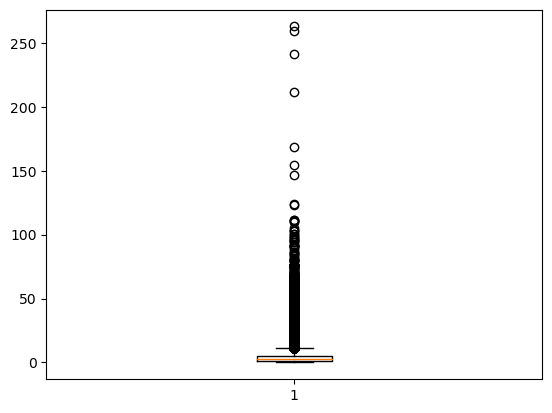

In [34]:
plt.boxplot(df['trip_distance'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1feebb1f790>,
 'caps': [<matplotlib.lines.Line2D at 0x1feebb7d250>,
 'boxes': [<matplotlib.lines.Line2D at 0x1feebb1fc40>],
 'medians': [<matplotlib.lines.Line2D at 0x1feebb7d820>],
 'fliers': [<matplotlib.lines.Line2D at 0x1feebb7daf0>],
 'means': []}

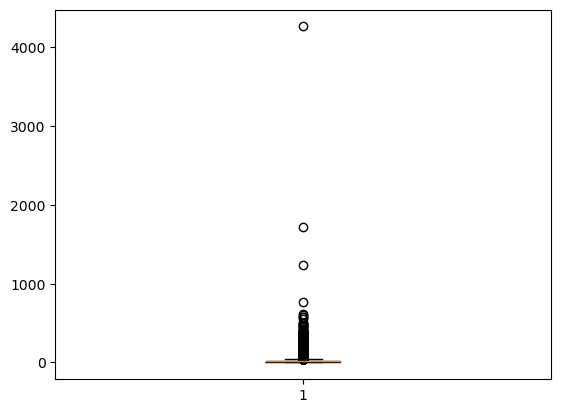

In [35]:
plt.boxplot(df['fare_amount'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1feeb9c0730>,
 'caps': [<matplotlib.lines.Line2D at 0x1feeb9c0cd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1feeb9c0460>],
 'medians': [<matplotlib.lines.Line2D at 0x1feeb9a02b0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1feeb9a0580>],
 'means': []}

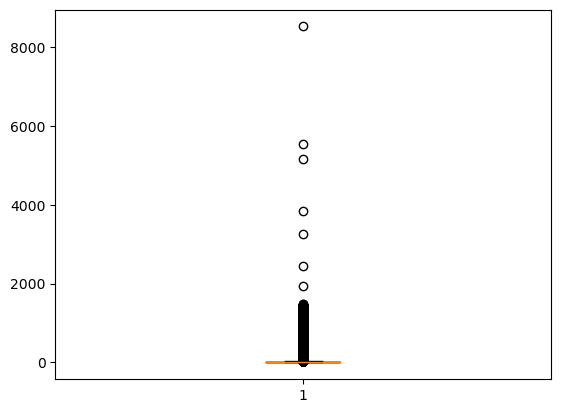

In [36]:
plt.boxplot(df['duration'])

Removing outliers from the trip distance, fare amount, duration columns

In [37]:
for col in ['trip_distance', 'fare_amount', 'duration']:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    
    lower_bound = q1 - 1.5*iqr
    upper_bound = q3 + 1.5*iqr
    df = df[(df[col]>=lower_bound) & (df[col]<=upper_bound)]

In [38]:
df

,passenger_count,trip_distance,payment_type,fare_amount,duration
0,1,1.20,Card,6.0,4.800000
1,1,1.20,Card,7.0,7.416667
2,1,0.60,Card,6.0,6.183333
3,1,0.80,Card,5.5,4.850000
5,1,0.03,Cash,2.5,0.883333
...,...,...,...,...,...
6339550,4,2.40,Card,10.5,12.383333
6339555,3,2.09,Card,10.0,14.800000
6339561,1,4.11,Card,17.5,21.500000
6339563,1,2.13,Card,13.0,19.000000


Visualizing the distribution of payment_type and trip_duration

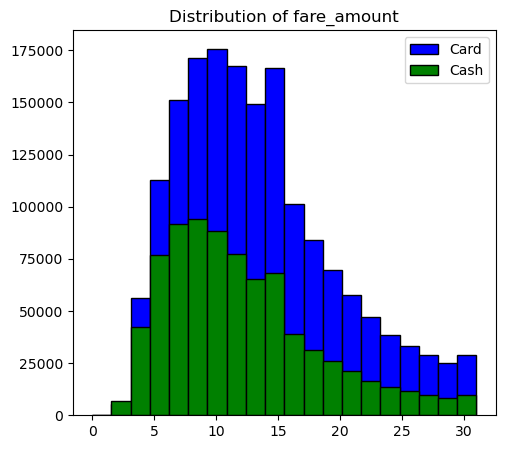

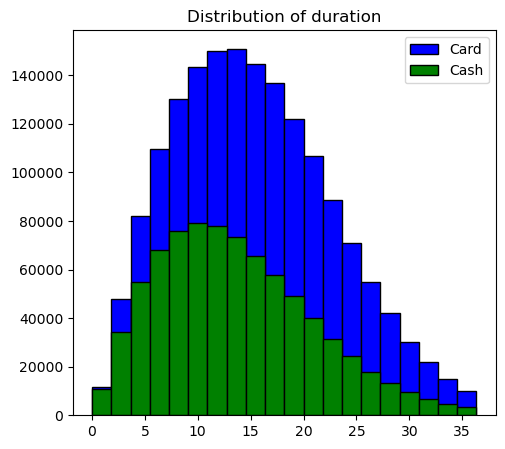

In [42]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.title('Distribution of fare_amount')
plt.hist(df[df['payment_type']=='Card']['fare_amount'], histtype= 'barstacked', color='blue', edgecolor = 'k', bins=20, label='Card')
plt.hist(df[df['payment_type']=='Cash']['fare_amount'], histtype= 'barstacked', color='green', edgecolor = 'k', bins=20, label='Cash')
plt.legend()
plt.show()

plt.figure(figsize=(12,5))
plt.subplot(1,2,2)
plt.title('Distribution of duration')
plt.hist(df[df['payment_type']=='Card']['duration'], histtype= 'barstacked', color='blue', edgecolor = 'k', bins=20, label='Card')
plt.hist(df[df['payment_type']=='Cash']['duration'], histtype= 'barstacked', color='green', edgecolor = 'k', bins=20, label='Cash')
plt.legend()
plt.show()

In [43]:
df.groupby('payment_type').agg({'fare_amount':['mean', 'std'], 'trip_distance':['mean', 'std']})

fare_amount          trip_distance          
                    mean      std          mean       std
payment_type                                             
Card           13.417504  6.32437      3.134509  2.239577
Cash           12.062938  6.08891      2.740085  2.164087

Percentage Distribution for Preference of Payment Type

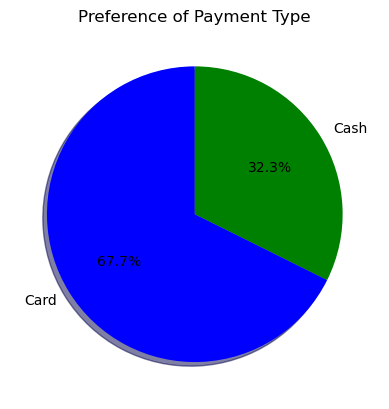

In [46]:
plt.title('Preference of Payment Type')
plt.pie(df['payment_type'].value_counts(normalize=True), labels=df['payment_type'].value_counts().index,
       startangle = 90, shadow=True, autopct = '%1.1f%%', colors = ['blue', 'green'])
plt.show()

In [47]:
passenger_count = df.groupby(['payment_type', 'passenger_count'])[['passenger_count']].count()
passenger_count.rename(columns={'passenger_count':'count'}, inplace=True)
passenger_count.reset_index(inplace=True)

In [48]:
passenger_count

,payment_type,passenger_count,count
0,Card,1,942820
1,Card,2,334447
2,Card,3,124098
3,Card,4,64507
4,Card,5,125752
5,Card,6,78677
6,Cash,1,473215
7,Cash,2,158432
8,Cash,3,55305
9,Cash,4,33098


In [49]:
passenger_count['perc'] = (passenger_count['count']/passenger_count['count'].sum())*100
passenger_count

,payment_type,passenger_count,count,perc
0,Card,1,942820,38.192761
1,Card,2,334447,13.548137
2,Card,3,124098,5.027094
3,Card,4,64507,2.613119
4,Card,5,125752,5.094096
5,Card,6,78677,3.187132
6,Cash,1,473215,19.169499
7,Cash,2,158432,6.417933
8,Cash,3,55305,2.240354
9,Cash,4,33098,1.340769


Creating a dataframe to show the percentage values of passenger count according to payment type

In [59]:
df2 = pd.DataFrame(columns=['payment_type', 1,2,3,4,5,6])
df2['payment_type'] = ['Card', 'Cash']
df2.iloc[0,1:] = passenger_count.iloc[0:6,-1]
df2.iloc[1,1:] = passenger_count.iloc[6:,-1]
df2

,payment_type,1,2,3,4,5,6
0,Card,38.192761,13.548137,5.027094,2.613119,5.094096,3.187132
1,Cash,19.169499,6.417933,2.240354,1.340769,1.956183,1.212923


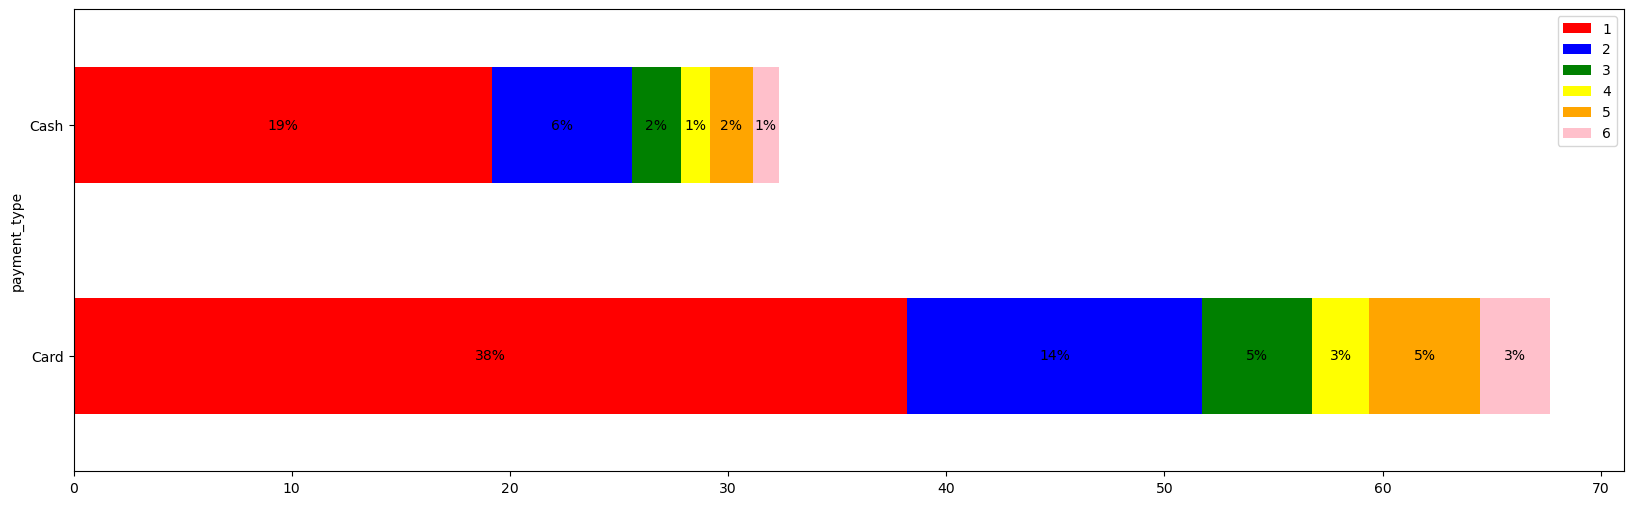

In [68]:
fig, ax = plt.subplots(figsize=(20,6))
df2.plot(x='payment_type', kind='barh', stacked=True, ax=ax, color=['red', 'blue', 'green', 'yellow', 'orange', 'pink'])

for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x,y = p.get_xy()
    ax.text(x+width / 2,
           y + height / 2,
           '{:.0f}%'.format(width),
           horizontalalignment = 'center',
           verticalalignment = 'center')

## Hypothesis Testing

Hypothesis Testing on the difference in average fare amount between the customers who pay using Card and customers who pay using Cash

### Null Hypothesis:

There is no significance differenvce in Average Fare amount between customers who use credit cards and customers who use cash

### Alternate Hypothesis:

There is a significance difference in Average Fare amount between customers who use credit cards and customers who use cash

Plot a Quantile-Quantile plot to check whether the fare amount follows a normal distribution or not.

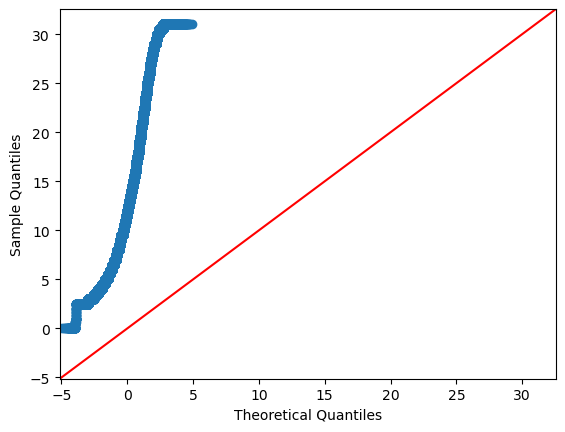

In [69]:
import statsmodels.api as sm

sm.qqplot(df['fare_amount'], line='45')
plt.show()

The curve is not aligned on the 45 degree axis so the fare amount doesn't follow a normal dstribution. This confirms that we will have to follow T-test to perform our Hypothesis testing of the analysis.

In [70]:
sample_card = df[df['payment_type'] == 'Card']['fare_amount']
sample_cash = df[df['payment_type'] == 'Cash']['fare_amount']

In [72]:
t_stats, p_value = st.ttest_ind(a=sample_card, b=sample_cash, equal_var = False)
print('T-statistics:', t_stats, 'P-value:', p_value)

T-statistics: 161.45291580460116 P-value: 0.0


Here we can see that the P-value for our hypothesis is smaller than 0.05 so we will be rejecting the Null Hypothesis. Therefore, our Alternate Hypothesis stands true in this case.

So we can conclude that there is a significant difference between Average Fare amount between customers who use credit cards and customers who use cash

#### Exporting the dataframe to perform regression analysis on the data to predict the fare amount based on the duration of the ride and other factors 

In [73]:
df.to_csv('nyc_cleaned.csv', index=False)

In [74]:
df.shape

(2468583, 5)